In [3]:
import gdal
import osgeo
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
import rasterio
import rasterio as rio
from rasterio import plot as rioplot

[[0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 ...
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]]
5.132183659228629
33.040572297572695


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


(13051, 8671)
37.22813796815751
47.91891873738592


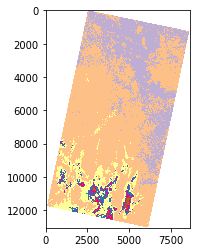

In [2]:
b4 = rio.open( "B4_2015.tif")
b4 = b4.read(1)
b5 = rio.open("B5_2015.tif")
b5 = b5.read(1)
b10 = rio.open("B10_2015.tif")
b10 = b10.read(1)

ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 65.74739272
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
plt.show()


In [3]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(542500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_20151104.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

[[0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]
 [0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]
 [0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]
 ...
 [0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]
 [0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]
 [0.98747503 0.98747503 0.98747503 ... 0.98747503 0.98747503 0.98747503]]
2.5987625718127885
30.899444709075137


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


(13051, 8671)
33.48027427769516
44.69950012921342


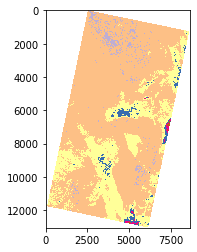

In [13]:
b4 = rio.open( "B4_2016.tif")
b4 = b4.read(1)
b5 = rio.open("B5_2016.tif")
b5 = b5.read(1)
b10 = rio.open("B10_2016.tif")
b10 = b10.read(1)

ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 62.93986178
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
plt.show()


In [27]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(542500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_20161224.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

[[0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]
 [0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]
 [0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]
 ...
 [0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]
 [0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]
 [0.9862596 0.9862596 0.9862596 ... 0.9862596 0.9862596 0.9862596]]
7.8213518251683665
24.68472523637123


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


(13051, 8671)
31.744674115624267
37.671146511963954


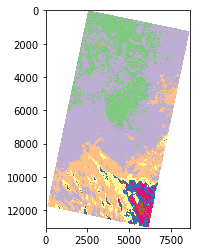

In [28]:
b4 = rio.open( "B4_2017.tif")
b4 = b4.read(1)
b5 = rio.open("B5_2017.tif")
b5 = b5.read(1)
b10 = rio.open("B10_2017.tif")
b10 = b10.read(1)

ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 61.1645308
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
plt.show()


In [39]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(544500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_20171125.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

[[0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]
 [0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]
 [0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]
 ...
 [0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]
 [0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]
 [0.98709227 0.98709227 0.98709227 ... 0.98709227 0.98709227 0.98709227]]
3.834025985725311
27.12983330550949


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


(13051, 8671)
31.87315952948779
44.33863520303461


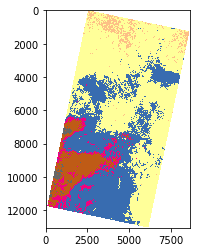

In [40]:
b4 = rio.open( "B4_2018.tif")
b4 = b4.read(1)
b5 = rio.open("B5_2018.tif")
b5 = b5.read(1)
b10 = rio.open("B10_2018.tif")
b10 = b10.read(1)

ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 63.03329449
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
plt.show()


In [45]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(545700.000,1714200.000 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_20181214.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

[[0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 ...
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]
 [0.98655722 0.98655722 0.98655722 ... 0.98655722 0.98655722 0.98655722]]
5.132183659228631
30.326474067572544


C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


(13051, 8671)
34.848952298507186
47.80086944767048


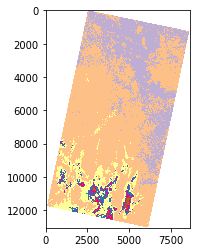

In [47]:
b4 = rio.open( "B4_2019.tif")
b4 = b4.read(1)
b5 = rio.open("B5_2019.tif")
b5 = b5.read(1)
b10 = rio.open("B10_2019.tif")
b10 = b10.read(1)

ML10 =  3.3420E-04
AL10 = 0.1
K1 = 774.8853
K2 = 1321.0789

ndvi = b5 - b4

L10 = (ML10*b10) + AL10
BT = K2 / (np.log(K1/L10) + 1) - 273.15
Pv = ((ndvi - np.nanmin(ndvi)) / (np.nanmax(ndvi) - np.nanmin(ndvi)))**2
ε = 0.004 * Pv + 0.986
print(ε)
LST = (BT / (1 + ((0.0000115 * BT / 0.014388) * np.log(ε))))
ndvi = b5 - b4
LST = np.where(LST<-140, np.nan, LST) + 63.03329449
print(np.nanstd(LST))
print(np.nanmean(LST))

UHI = np.where(LST<30,np.nan,(LST))
UHI = np.where(UHI>48,np.nan,(UHI))
UHI = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
print(LST.shape)          

print(np.nanmin(UHI))
print(np.nanmax(UHI))

rio.plot.show((LST), cmap='Accent_r')
plt.show()


In [48]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(545700.000,1714200.000 , 30, 30)

new_dataset = rasterio.open('Surface_TEMP_20191115.tif', 'w', driver='GTiff',
                            height = LST.shape[0], width = LST.shape[1],
                            count=1, dtype=str(LST.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(LST, 1)
new_dataset.close()

-8.20262798075494
51.17131363837996
-6.37491354175494
52.999028077379954


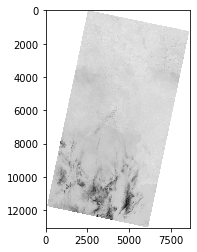

Surface_TEMP_20151104.tif
4.711629108551179
44.69950012921342
11.172520084551179
51.16039110521342


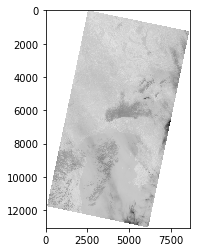

Surface_TEMP_20161224.tif
-21.139754863798892
37.671146511963954
-16.53600126979889
42.27490010596395


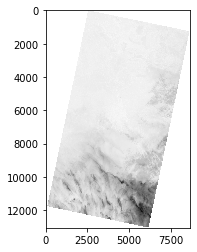

Surface_TEMP_20171125.tif
11.025304455317688
44.33863520303461
15.255465411317687
48.56879615903461


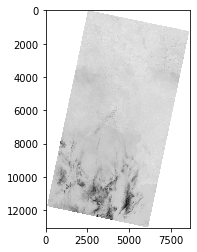

Surface_TEMP_20181214.tif
-10.91672621075493
48.457215408379966
-8.129142460754931
51.24479915837997


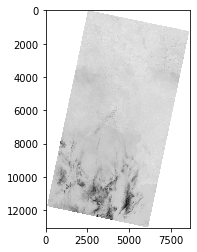

Surface_TEMP_20191115.tif


In [57]:
path = 'C:/Users/Kittiphong/'
for n in os.listdir(path):
    if 'Surface_TEMP_20151104.tif' == n:
        Y2015 = rio.open(path+n)
        Y2015 = (Y2015.read(1))
        
        print(np.nanmin(Y2015))
        print(np.nanmax(Y2015))
        
        Y2015 = Y2015 - (-1.827714439)
        
        print(np.nanmin(Y2015))
        print(np.nanmax(Y2015))
        
        rio.plot.show((Y2015), cmap='Greys_r')
                
        plt.show()
        print(n)
        
    if 'Surface_TEMP_20161224.tif' == n:
        Y2016 = rio.open(path+n)
        Y2016 = (Y2016.read(1))
        
        print(np.nanmin(Y2016))
        print(np.nanmax(Y2016))
        
        Y2016 = Y2016 - (-6.460890976)
        
        print(np.nanmin(Y2016))
        print(np.nanmax(Y2016))
        
        rio.plot.show((Y2016), cmap='Greys_r')
                
        plt.show()
        print(n)
        
    if 'Surface_TEMP_20171125.tif' == n:
        Y2017 = rio.open(path+n)
        Y2017 = (Y2017.read(1))
        
        print(np.nanmin(Y2017))
        print(np.nanmax(Y2017))
        
        Y2017 = Y2017 - (-4.603753594)
        
        print(np.nanmin(Y2017))
        print(np.nanmax(Y2017))
        
        rio.plot.show((Y2017), cmap='Greys_r')
                
        plt.show()
        print(n)
        
    if 'Surface_TEMP_20181214.tif' == n:
        Y2018 = rio.open(path+n)
        Y2018 = (Y2018.read(1))
        
        print(np.nanmin(Y2018))
        print(np.nanmax(Y2018))
        
        Y2018 = Y2018 - (-4.230160956)
        
        print(np.nanmin(Y2018))
        print(np.nanmax(Y2018))
        
        rio.plot.show((Y2015), cmap='Greys_r')
                
        plt.show()
        print(n)
        
    if 'Surface_TEMP_20191115.tif' == n:
        Y2019 = rio.open(path+n)
        Y2019 = (Y2019.read(1))
        
        print(np.nanmin(Y2019))
        print(np.nanmax(Y2019))
        
        Y2019 = Y2019 - (-2.78758375)
        
        print(np.nanmin(Y2019))
        print(np.nanmax(Y2019))
        
        rio.plot.show((Y2015), cmap='Greys_r')
                
        plt.show()
        print(n)

In [53]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(542500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_20151104.tif', 'w', driver='GTiff',
                            height = Y2015.shape[0], width = Y2015.shape[1],
                            count=1, dtype=str(Y2015.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2015, 1)
new_dataset.close()

In [54]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(542500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_20161224.tif', 'w', driver='GTiff',
                            height = Y2016.shape[0], width = Y2016.shape[1],
                            count=1, dtype=str(Y2016.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2016, 1)
new_dataset.close()

In [55]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(544500.000,1714500.000 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_20171125.tif', 'w', driver='GTiff',
                            height = Y2017.shape[0], width = Y2017.shape[1],
                            count=1, dtype=str(Y2017.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2017, 1)
new_dataset.close()

In [58]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(545700.000,1714200.000 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_20181214.tif', 'w', driver='GTiff',
                            height = Y2018.shape[0], width = Y2018.shape[1],
                            count=1, dtype=str(Y2018.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2018, 1)
new_dataset.close()

In [59]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(545700.000,1714200.000 , 30, 30)

new_dataset = rasterio.open('Edit_Surface_TEMP_20191115.tif', 'w', driver='GTiff',
                            height = Y2019.shape[0], width = Y2019.shape[1],
                            count=1, dtype=str(Y2019.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2019, 1)
new_dataset.close()

C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


-0.0987949386689677


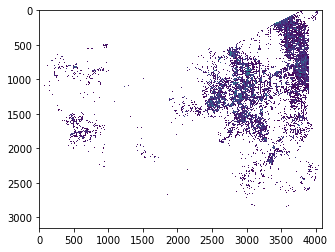

C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


-0.12672158017763602


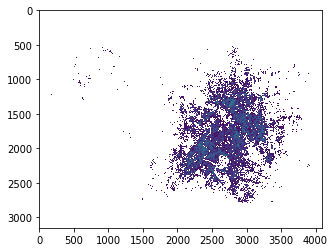

C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


-0.13824991657823837


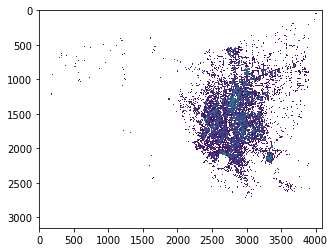

C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less


-0.12419732417345086


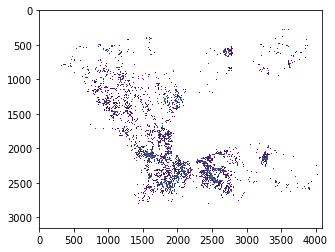

C:\Users\Kittiphong\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


-0.09737403674894751


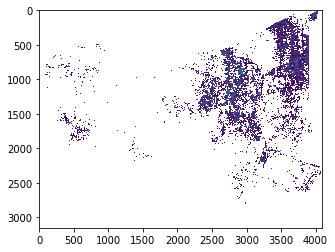

In [5]:
path = "D:/Project/Pixel/output/LST/"
Y2019 = rio.open( path + "2019BKKandFriends.tif")
Y2019 = Y2019.read(1)
UHI = np.where(Y2019<24,np.nan,(Y2019))
UHI = np.where(Y2019>45,np.nan,(UHI))
Y2019 = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
Y2019 = (Y2019 - np.nanmean(Y2019))/(np.nanmax(Y2019) - np.nanmin(Y2019))

print(np.nanmin(Y2019))
plt.imshow(Y2019)
plt.show()

Y2018 = rio.open(path + "2018BKKandFriends.tif")
Y2018 = Y2018.read(1)
UHI = np.where(Y2018<24,np.nan,(Y2018))
UHI = np.where(Y2018>45,np.nan,(UHI))
Y2018 = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
Y2018 = (Y2018 - np.nanmean(Y2018))/(np.nanmax(Y2018) - np.nanmin(Y2018))

print(np.nanmin(Y2018))
plt.imshow(Y2018)
plt.show()


Y2017 = rio.open(path + "2017BKKandFriends.tif")
Y2017 = Y2017.read(1)
UHI = np.where(Y2017<24,np.nan,(Y2017))
UHI = np.where(Y2017>45,np.nan,(UHI))
Y2017 = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
Y2017 = (Y2017 - np.nanmean(Y2017))/(np.nanmax(Y2017) - np.nanmin(Y2017))

print(np.nanmin(Y2017))
plt.imshow(Y2017)
plt.show()


Y2016 = rio.open(path + "2016BKKandFriends.tif")
Y2016 = Y2016.read(1)
UHI = np.where(Y2016<24,np.nan,(Y2016))
UHI = np.where(Y2016>45,np.nan,(UHI))
Y2016 = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
Y2016 = (Y2016 - np.nanmean(Y2016))/(np.nanmax(Y2016) - np.nanmin(Y2016))

print(np.nanmin(Y2016))
plt.imshow(Y2016)
plt.show()


Y2015 = rio.open(path + "2015BKKandFriends.tif")
Y2015 = Y2015.read(1)
UHI = np.where(Y2015<24,np.nan,(Y2015))
UHI = np.where(Y2015>45,np.nan,(UHI))
Y2015 = np.where(UHI<(np.nanmean(UHI)+np.nanstd(UHI)),np.nan,UHI)
Y2015 = (Y2015 - np.nanmean(Y2015))/(np.nanmax(Y2015) - np.nanmin(Y2015))

print(np.nanmin(Y2015))
plt.imshow(Y2015)
plt.show()


In [6]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(589630.0000000000000000,1578900.0000000000000000 , 30, 30)

new_dataset = rasterio.open('Crop_Index_UHI2015.tif', 'w', driver='GTiff',
                            height = Y2015.shape[0], width =Y2015.shape[1],
                            count=1, dtype=str(Y2015.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2015, 1)
new_dataset.close()

In [7]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(589630.0000000000000000,1578900.0000000000000000 , 30, 30)

new_dataset = rasterio.open('Crop_Index_UHI2016.tif', 'w', driver='GTiff',
                            height = Y2016.shape[0], width = Y2016.shape[1],
                            count=1, dtype=str(Y2016.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2016, 1)
new_dataset.close()

In [8]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(589630.0000000000000000,1578900.0000000000000000 , 30, 30)

new_dataset = rasterio.open('Crop_Index_UHI2017.tif', 'w', driver='GTiff',
                            height = Y2017.shape[0], width = Y2017.shape[1],
                            count=1, dtype=str(Y2017.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2017, 1)
new_dataset.close()

In [9]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(589630.0000000000000000,1578900.0000000000000000, 30, 30)

new_dataset = rasterio.open('Crop_Index_UHI2018.tif', 'w', driver='GTiff',
                            height = Y2018.shape[0], width = Y2018.shape[1],
                            count=1, dtype=str(Y2018.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2018, 1)
new_dataset.close()

In [10]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(589630.0000000000000000,1578900.0000000000000000 , 30, 30)

new_dataset = rasterio.open('Crop_Index_UHI2019.tif', 'w', driver='GTiff',
                            height = Y2019.shape[0], width = Y2019.shape[1],
                            count=1, dtype=str(Y2019.dtype),
                            crs='+proj=utm +zone=47P +ellps=WGS84 +datum=WGS84 +units=m +no_defs',
                            transform=transform)

new_dataset.write(Y2019, 1)
new_dataset.close()